In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from nltk.corpus import stopwords
from sklearn.metrics import log_loss

stopwords = stopwords.words('english')
sns.set_context('notebook')

In [2]:
train = pd.read_csv('C:/Users/suraprak/Desktop/Deep Learning/DataSet/Scary NLP/train/train.csv', skiprows=1, names=['ID', 'Text', 'Author']).set_index('ID')
test = pd.read_csv('C:/Users/suraprak/Desktop/Deep Learning/DataSet/Scary NLP/test/test.csv', skiprows=1, names=['ID', 'Text']).set_index('ID')

In [3]:
train.index = [id[2:] for id in train.index]
test.index = [id[2:] for id in test.index]

In [4]:
print(train.index)

Index(['26305', '17569', '11008', '27763', '12958', '22965', '09674', '13515',
       '19322', '00912',
       ...
       '26790', '14263', '14420', '03325', '07567', '17718', '08973', '05267',
       '17513', '00393'],
      dtype='object', length=19579)


In [5]:
display(train.head())
display(test.head())

print('Training Sample : ', train['Text'][0])
print('Author of Sample ', train['Author'][0])
print('Training Data Shape', train.shape)
print('Testing Data Shape', test.shape)

,Text,Author
26305,"This process, however, afforded me no means of...",EAP
17569,It never once occurred to me that the fumbling...,HPL
11008,"In his left hand was a gold snuff box, from wh...",EAP
27763,How lovely is spring As we looked from Windsor...,MWS
12958,"Finding nothing else, not even gold, the Super...",HPL


,Text
02310,"Still, as I urged our leaving Ireland with suc..."
24541,"If a fire wanted fanning, it could readily be ..."
00134,And when they had broken down the frail door t...
27757,While I was thinking how I should possibly man...
04081,I am not sure to what limit his knowledge may ...


Training Sample :  This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
Author of Sample  EAP
Training Data Shape (19579, 2)
Testing Data Shape (8392, 1)


In [6]:
print('Training DataSet Info.')
display(train.info())

print('Testing DataSet Info.')
display(test.info())

Training DataSet Info.
<class 'pandas.core.frame.DataFrame'>
Index: 19579 entries, 26305 to 00393
Data columns (total 2 columns):
Text      19579 non-null object
Author    19579 non-null object
dtypes: object(2)
memory usage: 1.1+ MB


None

Testing DataSet Info.
<class 'pandas.core.frame.DataFrame'>
Index: 8392 entries, 02310 to 04282
Data columns (total 1 columns):
Text    8392 non-null object
dtypes: object(1)
memory usage: 131.1+ KB


None

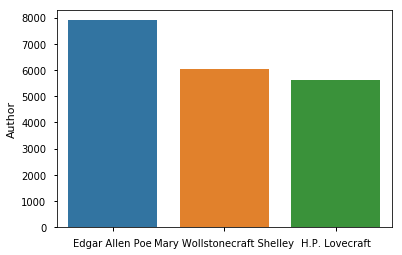

In [7]:
sns.barplot(x=['Edgar Allen Poe', 'Mary Wollstonecraft Shelley', 'H.P. Lovecraft'], y=train['Author'].value_counts())
plt.show()

In [8]:
all_text = ' '.join([text for text in train['Text']])
print ('Number of words in all_text: ', len(all_text))

Number of words in all_text:  2937973


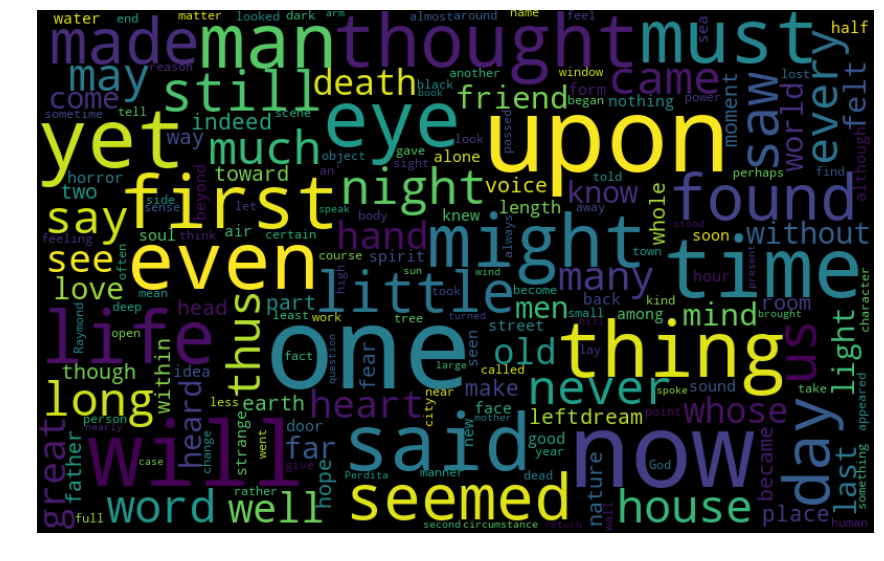

In [9]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
eap=train[train['Author'] == 'EAP']
eap_text = ' '.join(text for text in eap['Text'])
print('Number of words in eap_text : ', len(eap_text))

Number of words in eap_text :  1131484


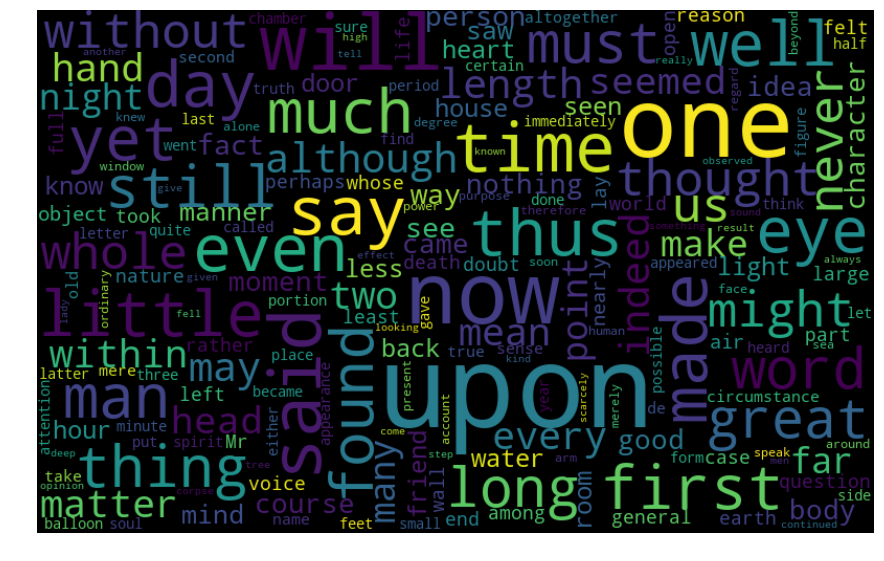

In [11]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(eap_text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
mws = train[train['Author'] == 'MWS']
mws_text = ' '.join(text for text in mws['Text'])
print("Number of words in eap_text : ",len(mws_text))

Number of words in eap_text :  922675


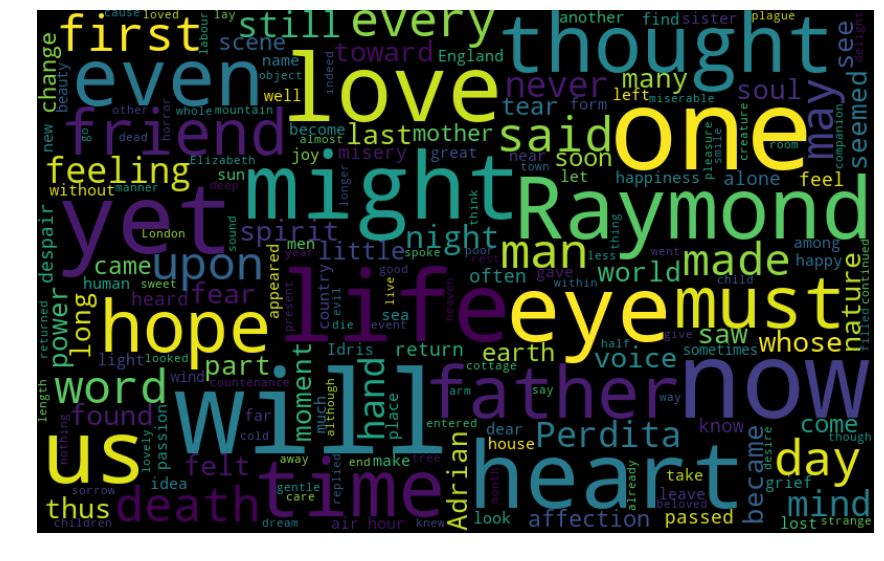

In [13]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(mws_text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
hpl = train[train['Author'] == 'HPL']
hpl_text = ' '.join(text for text in hpl['Text'])
print('Number of words in eap_text : ', len(hpl_text))

Number of words in eap_text :  883812


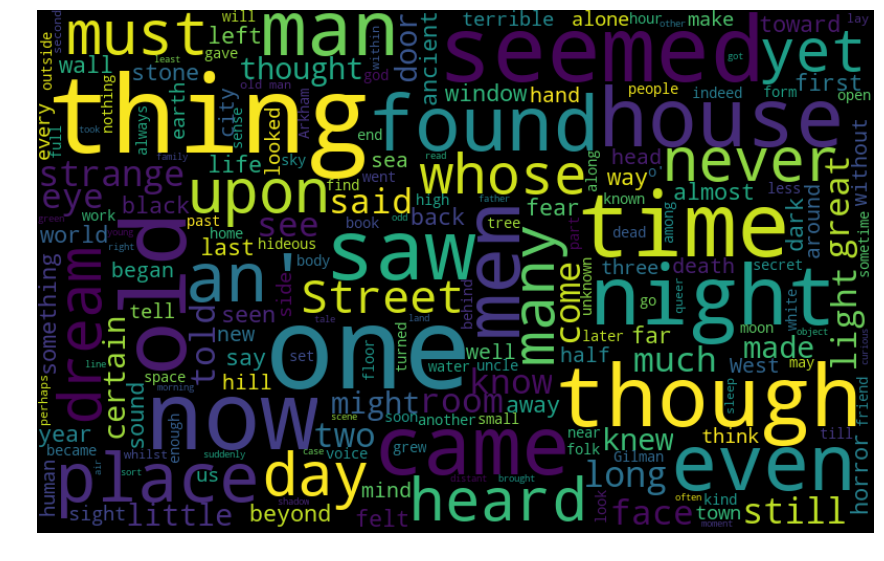

In [15]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(hpl_text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
import spacy

In [17]:
nlp = spacy.load('en_core_web_sm')

In [18]:
# Clean text before feeding it to spaCy
punctuations = string.punctuation

# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [19]:
# Grab all text associated with Edgar Allen Poe
eap_text = [text for text in train[train['Author'] == 'EAP']['Text']]

# Grab all text associated with H.P. Lovecraft
hpl_text = [text for text in train[train['Author'] == 'HPL']['Text']]

# Grab all text associated with Mary Wollstonecraft Shelley
mws_text = [text for text in train[train['Author'] == 'MWS']['Text']]

In [20]:
# Clean up all text
eap_clean = cleanup_text(eap_text)
eap_clean = ' '.join(eap_clean).split()
# 's appears a lot in the text, so we get rid of it since it's not a word
eap_clean = [word for word in eap_clean if word != '\'s']

In [21]:
hpl_clean = cleanup_text(hpl_text)
hpl_clean = ' '.join(hpl_clean).split()
# 's appears a lot in the text, so we get rid of it since it's not a word
hpl_clean = [word for word in hpl_clean if word != '\'s']

In [22]:
mws_clean = cleanup_text(mws_text)
mws_clean = ' '.join(mws_clean).split()
# 's appears a lot in the text, so we get rid of it since it's not a word
mws_clean = [word for word in mws_clean if word != '\'s']

In [23]:
# Count all unique words
eap_counts = Counter(eap_clean)
hpl_counts = Counter(hpl_clean)
mws_counts = Counter(mws_clean)

In [24]:
print ("EAP Counts : ", eap_counts)
print ("HPL Counts : ", hpl_counts)
print ("MWS Counts : ", mws_counts)

EAP Counts :  Counter({'upon': 1025, 'say': 689, 'one': 671, 'could': 458, 'make': 450, 'would': 420, 'see': 381, 'may': 364, 'find': 328, 'man': 321, 'time': 313, 'take': 298, 'great': 284, 'little': 275, 'know': 274, 'eye': 270, 'well': 267, 'even': 261, 'day': 257, 'however': 254, 'thus': 254, 'first': 249, 'long': 235, 'yet': 232, 'much': 230, 'give': 229, 'good': 227, 'thing': 221, 'come': 214, 'two': 213, 'every': 206, 'go': 204, 'never': 202, 'seem': 201, 'think': 196, 'still': 196, 'must': 196, 'word': 192, 'hand': 185, 'point': 183, 'without': 182, 'head': 180, 'look': 179, 'speak': 178, 'length': 178, 'whole': 176, 'within': 175, 'like': 173, 'although': 171, 'mr.': 167, 'indeed': 167, 'matter': 165, 'mean': 162, 'far': 162, 'many': 161, 'become': 158, 'body': 156, 'place': 155, 'nothing': 153, 'let': 152, 'foot': 151, 'night': 151, 'fall': 150, 'three': 150, 'way': 150, 'feel': 147, 'open': 144, 'old': 143, 'call': 143, 'lie': 142, 'door': 140, 'person': 138, 'mind': 138, 'a

HPL Counts :  Counter({'see': 514, 'one': 497, 'could': 490, 'man': 482, 'thing': 433, 'old': 423, 'would': 402, 'come': 396, 'know': 385, 'seem': 317, 'time': 280, 'like': 279, 'find': 265, 'say': 263, 'night': 261, 'house': 256, 'may': 248, 'great': 248, 'tell': 246, 'make': 237, 'go': 235, 'though': 234, 'hear': 223, 'look': 209, 'think': 202, 'day': 197, 'dream': 196, 'never': 193, 'place': 193, 'even': 192, 'must': 189, 'upon': 186, 'street': 185, 'light': 184, 'many': 173, 'strange': 173, 'long': 172, 'whose': 170, 'yet': 165, 'year': 162, 'eye': 160, 'still': 158, 'take': 156, 'begin': 155, 'room': 154, 'door': 154, 'face': 149, 'window': 148, 'two': 148, 'feel': 148, 'fear': 145, 'much': 144, 'first': 142, 'beyond': 142, 'city': 141, 'life': 140, 'give': 139, 'little': 136, 'back': 135, 'leave': 135, 'certain': 133, 'last': 133, 'sound': 130, 'grow': 128, 'almost': 127, 'far': 126, 'black': 125, 'stone': 125, 'ancient': 125, 'get': 124, 'something': 124, 'away': 123, 'new': 123

MWS Counts :  Counter({'one': 489, 'would': 475, 'may': 452, 'could': 383, 'love': 360, 'life': 347, 'see': 342, 'man': 337, 'yet': 318, 'day': 288, 'heart': 285, 'eye': 284, 'time': 277, 'make': 272, 'raymond': 270, 'say': 270, 'come': 265, 'even': 248, 'feel': 245, 'find': 245, 'become': 239, 'take': 234, 'every': 233, 'father': 213, 'must': 212, 'first': 211, 'give': 211, 'hope': 208, 'friend': 208, 'death': 201, 'upon': 200, 'know': 197, 'go': 192, 'look': 188, 'word': 188, 'fear': 185, 'return': 182, 'shall': 180, 'ever': 178, 'hand': 177, 'never': 175, 'night': 175, 'mind': 172, 'perdita': 169, 'like': 167, 'good': 166, 'still': 166, 'leave': 164, 'pass': 162, 'feeling': 160, 'die': 159, 'many': 157, 'hear': 156, 'year': 155, 'seem': 155, 'place': 155, 'child': 154, 'change': 153, 'spirit': 151, 'long': 149, 'think': 148, 'great': 147, 'towards': 147, 'tear': 146, 'nature': 142, 'thought': 142, 'adrian': 141, 'whose': 139, 'thus': 136, 'appear': 135, 'last': 135, 'voice': 132, 'e

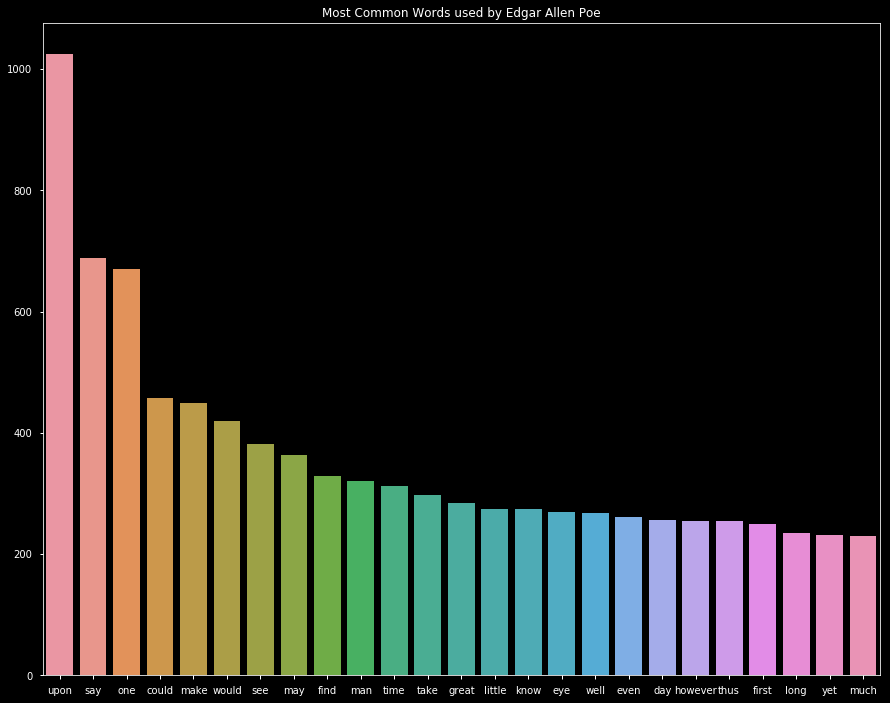

In [25]:
# Plot top 25 most frequently occuring words for Edgar Allen Poe
eap_common_words = [word[0] for word in eap_counts.most_common(25)]
eap_common_counts = [word[1] for word in eap_counts.most_common(25)]

# Use spooky background
plt.style.use('dark_background')
plt.figure(figsize=(15, 12))

sns.barplot(x=eap_common_words, y=eap_common_counts)
plt.title('Most Common Words used by Edgar Allen Poe')
plt.show()

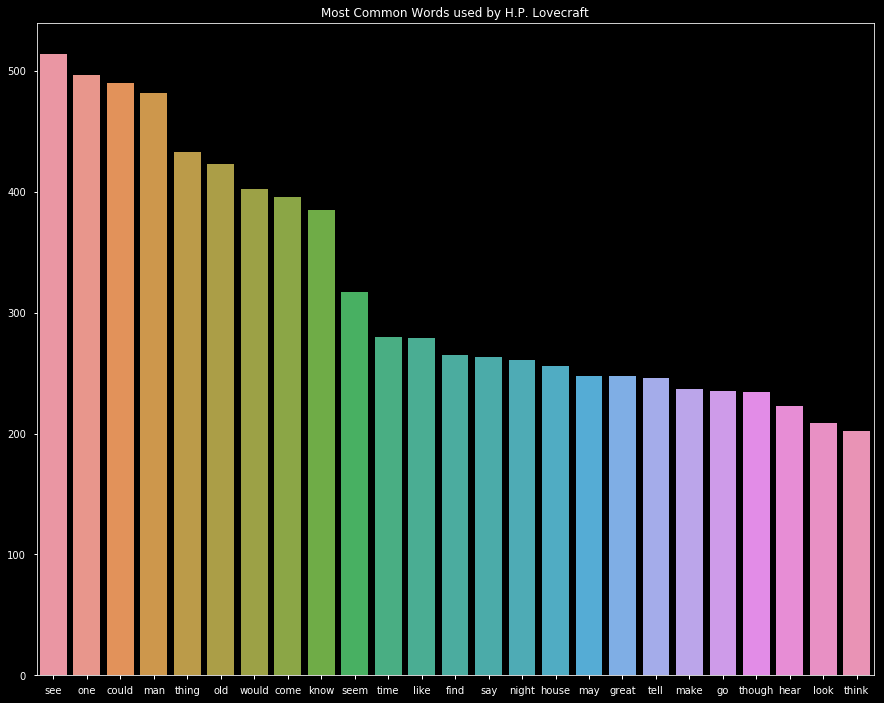

In [26]:
# Plot top 25 most frequently occuring words for H.P. Lovecraft
hpl_common_words = [word[0] for word in hpl_counts.most_common(25)]
hpl_common_counts = [word[1] for word in hpl_counts.most_common(25)]

plt.figure(figsize=(15, 12))
sns.barplot(x=hpl_common_words, y=hpl_common_counts)
plt.title('Most Common Words used by H.P. Lovecraft')
plt.show()

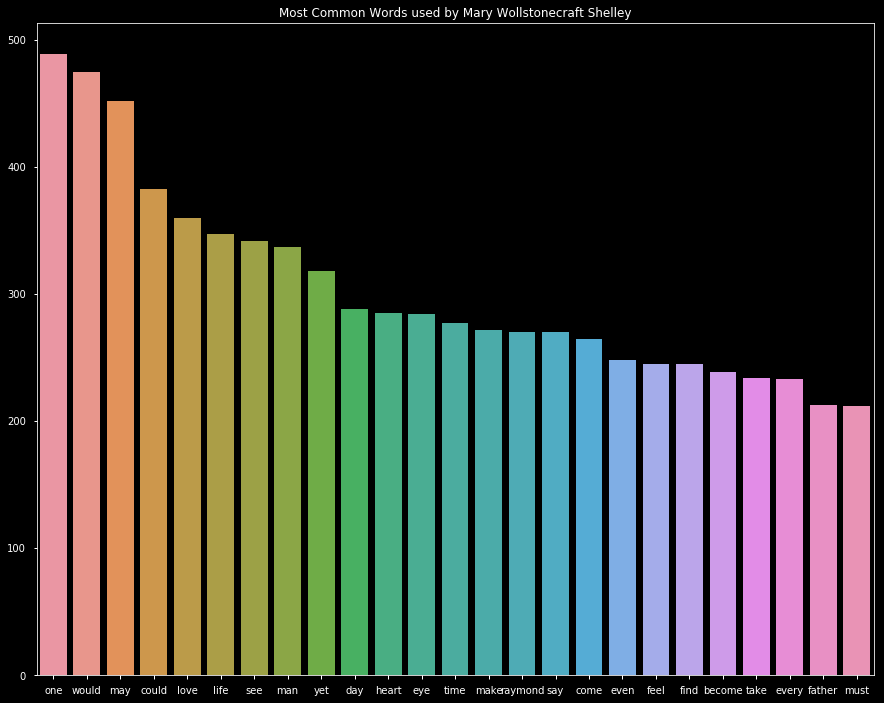

In [27]:
# Plot top 25 most frequently occuring words for Mary Wollstonecraft Shelley
mws_common_words = [word[0] for word in mws_counts.most_common(25)]
mws_common_counts = [word[1] for word in mws_counts.most_common(25)]

plt.figure(figsize=(15, 12))
sns.barplot(x=mws_common_words, y=mws_common_counts)
plt.title('Most Common Words used by Mary Wollstonecraft Shelley')
plt.show()

In [28]:
# Cleanup text and make sure it retains original shape
print('Original training data shape: ', train['Text'].shape)
train_cleaned = cleanup_text(train['Text'], logging=True)
print('Cleaned up training data shape: ', train_cleaned.shape)

Original training data shape:  (19579,)
Processed 1000 out of 19579 documents.
Processed 2000 out of 19579 documents.
Processed 3000 out of 19579 documents.
Processed 4000 out of 19579 documents.
Processed 5000 out of 19579 documents.
Processed 6000 out of 19579 documents.
Processed 7000 out of 19579 documents.
Processed 8000 out of 19579 documents.
Processed 9000 out of 19579 documents.
Processed 10000 out of 19579 documents.
Processed 11000 out of 19579 documents.
Processed 12000 out of 19579 documents.
Processed 13000 out of 19579 documents.
Processed 14000 out of 19579 documents.
Processed 15000 out of 19579 documents.
Processed 16000 out of 19579 documents.
Processed 17000 out of 19579 documents.
Processed 18000 out of 19579 documents.
Processed 19000 out of 19579 documents.
Cleaned up training data shape:  (19579,)


In [29]:
# Parse documents and print some info
print('Parsing documents...')

start = time()

train_vec = []
for doc in nlp.pipe(train_cleaned, batch_size=500):
    if doc.has_vector:
        train_vec.append(doc.vector)
    # If doc doesn't have a vector, then fill it with zeros.
    else:
        train_vec.append(np.zeros((128,), dtype="float32"))
        
# train_vec = [doc.vector for doc in nlp.pipe(train_cleaned, batch_size=500)]
train_vec = np.array(train_vec)

end = time()
print('Total time passed parsing documents: {} seconds'.format(end - start))
print('Total number of documents parsed: {}'.format(len(train_vec)))
print('Number of words in first document: ', len(train['Text'][0]))
print('Number of words in second document: ', len(train['Text'][1]))
print('Size of vector embeddings: ', train_vec.shape[1])
print('Shape of vectors embeddings matrix: ', train_vec.shape)

Parsing documents...
Total time passed parsing documents: 93.07504606246948 seconds
Total number of documents parsed: 19579
Number of words in first document:  231
Number of words in second document:  71
Size of vector embeddings:  128
Shape of vectors embeddings matrix:  (19579, 128)


In [30]:
# First combine train and test text into one dataframe to make parsing text easier
all_text = np.concatenate((train['Text'], test['Text']), axis=0)
all_text = pd.DataFrame(all_text, columns=['Text'])
print('Number of total text documents:', len(all_text))

Number of total text documents: 27971


In [31]:
# Define function to preprocess text for a word2vec model
def cleanup_text_word2vec(docs, logging=False):
    sentences = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents" % (counter, len(docs)))
        # Disable tagger so that lemma_ of personal pronouns (I, me, etc) don't getted marked as "-PRON-"
        doc = nlp(doc, disable=['tagger'])
        # Grab lemmatized form of words and make lowercase
        doc = " ".join([tok.lemma_.lower() for tok in doc])
        # Split into sentences based on punctuation
        doc = re.split("[\.?!;] ", doc)
        # Remove commas, periods, and other punctuation (mostly commas)
        doc = [re.sub("[\.,;:!?]", "", sent) for sent in doc]
        # Split into words
        doc = [sent.split() for sent in doc]
        sentences += doc
        counter += 1
    return sentences

In [32]:
train_cleaned_word2vec = cleanup_text_word2vec(all_text['Text'], logging=True)
print('Cleaned up training data size (i.e. number of sentences): ', len(train_cleaned_word2vec))

Processed 1000 out of 27971 documents
Processed 2000 out of 27971 documents
Processed 3000 out of 27971 documents
Processed 4000 out of 27971 documents
Processed 5000 out of 27971 documents
Processed 6000 out of 27971 documents
Processed 7000 out of 27971 documents
Processed 8000 out of 27971 documents
Processed 9000 out of 27971 documents
Processed 10000 out of 27971 documents
Processed 11000 out of 27971 documents
Processed 12000 out of 27971 documents
Processed 13000 out of 27971 documents
Processed 14000 out of 27971 documents
Processed 15000 out of 27971 documents
Processed 16000 out of 27971 documents
Processed 17000 out of 27971 documents
Processed 18000 out of 27971 documents
Processed 19000 out of 27971 documents
Processed 20000 out of 27971 documents
Processed 21000 out of 27971 documents
Processed 22000 out of 27971 documents
Processed 23000 out of 27971 documents
Processed 24000 out of 27971 documents
Processed 25000 out of 27971 documents
Processed 26000 out of 27971 docum

In [33]:
from gensim.models.word2vec import Word2Vec

text_dim = 300
print("Training Word2Vec model...")
wordvec_model = Word2Vec(train_cleaned_word2vec, size=text_dim, window=5, min_count=3, workers=4, sg=1)
print("Word2Vec model created.")
print("%d unique words represented by %d dimensional vectors" % (len(wordvec_model.wv.vocab), text_dim))

print(wordvec_model.wv.most_similar(positive=['woman', 'king'], negative=['man']))
print(wordvec_model.wv.most_similar_cosmul(positive=['woman', 'king'], negative=['man']))
print(wordvec_model.wv.doesnt_match("breakfast cereal dinner lunch".split()))
print(wordvec_model.wv.similarity('woman', 'man'))
print(wordvec_model.wv.similarity('gruesome', 'terrify'))

c:\users\suraprak\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Training Word2Vec model...
Word2Vec model created.
10770 unique words represented by 300 dimensional vectors
[('daughter', 0.8192856907844543), ('mother', 0.8174775838851929), ('widow', 0.8137178421020508), ('son', 0.8110939860343933), ('eldest', 0.7972331643104553), ('favourite', 0.7947808504104614), ('queen', 0.7945975065231323), ('harris', 0.7908221483230591), ('young', 0.7904989123344421), ('girl', 0.7855471968650818)]
[('daughter', 1.0672967433929443), ('mother', 1.0581128597259521), ('widow', 1.0548021793365479), ('son', 1.0463374853134155), ('favourite', 1.0373306274414062), ('queen', 1.0357589721679688), ('eldest', 1.033981442451477), ('young', 1.0311107635498047), ('husband', 1.0290266275405884), ('harris', 1.0286521911621094)]
dinner
0.7401124287720571
0.8744571294707844


In [34]:
# Define function to create word vectors given a cleaned piece of text.
def create_average_vec(doc):
    average = np.zeros((text_dim,), dtype='float32')
    num_words = 0.
    for word in doc.split():
        if word in wordvec_model.wv.vocab:
            average = np.add(average, wordvec_model[word])
            num_words += 1.
    if num_words != 0.:
        average = np.divide(average, num_words)
    return average

In [35]:
# Create word vectors
train_cleaned_vec = np.zeros((train.shape[0], text_dim), dtype="float32")  # 19579 x 300
for i in range(len(train_cleaned)):
    train_cleaned_vec[i] = create_average_vec(train_cleaned[i])

print("Train word vector shape:", train_cleaned_vec.shape)

c:\users\suraprak\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Train word vector shape: (19579, 300)


In [36]:
from sklearn.preprocessing import label_binarize

# Transform labels into one hot encoded format.
y_train_ohe = label_binarize(train['Author'], classes=['EAP', 'HPL', 'MWS'])
print('y_train_ohe shape: {}'.format(y_train_ohe.shape))
print('y_train_ohe samples:')
print(y_train_ohe[:5])

y_train_ohe shape: (19579, 3)
y_train_ohe samples:
[[1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


In [37]:
from sklearn.model_selection import train_test_split

# If using spaCy word vectors
#X_train, X_test, y_train, y_test = train_test_split(train_vec, y_train_ohe, test_size=0.2, random_state=21)
# If using Word2Vec word vectors
X_train, X_test, y_train, y_test = train_test_split(train_cleaned_vec, y_train_ohe, test_size=0.2, random_state=21)

print('X_train size: {}'.format(X_train.shape))
print('X_test size: {}'.format(X_test.shape))
print('y_train size: {}'.format(y_train.shape))
print('y_test size: {}'.format(y_test.shape))

X_train size: (15663, 300)
X_test size: (3916, 300)
y_train size: (15663, 3)
y_test size: (3916, 3)


In [38]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, LSTM, Embedding, Bidirectional, Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.optimizers import SGD

def build_model(architecture='mlp'):
    model = Sequential()
    if architecture == 'mlp':
        # Densely Connected Neural Network (Multi-Layer Perceptron)
        model.add(Dense(512, activation='relu', kernel_initializer='he_normal', input_dim=300))
        model.add(Dropout(0.2))
        model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
        model.add(Dropout(0.2))
        model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
        model.add(Dropout(0.2))
        model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
        model.add(Dropout(0.2))
        model.add(Dense(3, activation='softmax'))
    elif architecture == 'cnn':
        # 1-D Convolutional Neural Network
        inputs = Input(shape=(300,1))

        x = Conv1D(64, 3, strides=1, padding='same', activation='relu')(inputs)

        #Cuts the size of the output in half, maxing over every 2 inputs
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(128, 3, strides=1, padding='same', activation='relu')(x)
        x = GlobalMaxPooling1D()(x) 
        outputs = Dense(3, activation='softmax')(x)

        model = Model(inputs=inputs, outputs=outputs, name='CNN')
    elif architecture == 'lstm':
        # LSTM network
        inputs = Input(shape=(300,1))

        x = Bidirectional(LSTM(64, return_sequences=True),
                          merge_mode='concat')(inputs)
        x = Dropout(0.2)(x)
        x = Flatten()(x)
        outputs = Dense(3, activation='softmax')(x)

        model = Model(inputs=inputs, outputs=outputs, name='LSTM')
    else:
        print('Error: Model type not found.')
    return model

c:\users\suraprak\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [39]:
# Define keras model
# Using MLP in kernel for speed
model = build_model('mlp')
# model = build_model('cnn')
# model = build_model('lstm')

# If the model is a CNN then expand the dimensions of the training data
if model.name == "CNN" or model.name == "LSTM":
    X_train = np.expand_dims(X_train, axis=2)
    X_test = np.expand_dims(X_test, axis=2)
    print('Text train shape: ', X_test.shape)
    print('Text test shape: ', X_test.shape)
    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               154112    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
__________

In [40]:
# Compile the model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])

In [41]:
# Define number of epochs
epochs = 50

# Fit the model to the training data
estimator = model.fit(X_train, y_train,
                      validation_split=0.2,
                      epochs=epochs, batch_size=128, verbose=1)

Train on 12530 samples, validate on 3133 samples
Epoch 1/50
12530/12530 [==============================] - ETA: 33s - loss: 1.1082 - acc: 0.31 - ETA: 12s - loss: 1.1062 - acc: 0.31 - ETA: 8s - loss: 1.1006 - acc: 0.3578 - ETA: 6s - loss: 1.0994 - acc: 0.365 - ETA: 5s - loss: 1.0974 - acc: 0.370 - ETA: 5s - loss: 1.0943 - acc: 0.378 - ETA: 4s - loss: 1.0919 - acc: 0.383 - ETA: 4s - loss: 1.0886 - acc: 0.388 - ETA: 3s - loss: 1.0875 - acc: 0.390 - ETA: 3s - loss: 1.0851 - acc: 0.394 - ETA: 3s - loss: 1.0836 - acc: 0.395 - ETA: 3s - loss: 1.0794 - acc: 0.402 - ETA: 3s - loss: 1.0784 - acc: 0.406 - ETA: 2s - loss: 1.0777 - acc: 0.407 - ETA: 2s - loss: 1.0769 - acc: 0.410 - ETA: 2s - loss: 1.0750 - acc: 0.412 - ETA: 2s - loss: 1.0739 - acc: 0.412 - ETA: 2s - loss: 1.0731 - acc: 0.411 - ETA: 2s - loss: 1.0712 - acc: 0.414 - ETA: 2s - loss: 1.0694 - acc: 0.418 - ETA: 2s - loss: 1.0668 - acc: 0.424 - ETA: 1s - loss: 1.0641 - acc: 0.430 - ETA: 1s - loss: 1.0633 - acc: 0.429 - ETA: 1s - loss: 1.

Epoch 5/50
12530/12530 [==============================] - ETA: 2s - loss: 0.6482 - acc: 0.710 - ETA: 2s - loss: 0.6286 - acc: 0.718 - ETA: 2s - loss: 0.6604 - acc: 0.712 - ETA: 2s - loss: 0.6636 - acc: 0.717 - ETA: 2s - loss: 0.6576 - acc: 0.720 - ETA: 2s - loss: 0.6620 - acc: 0.718 - ETA: 2s - loss: 0.6636 - acc: 0.718 - ETA: 2s - loss: 0.6628 - acc: 0.722 - ETA: 2s - loss: 0.6664 - acc: 0.723 - ETA: 2s - loss: 0.6654 - acc: 0.723 - ETA: 2s - loss: 0.6679 - acc: 0.722 - ETA: 2s - loss: 0.6674 - acc: 0.722 - ETA: 2s - loss: 0.6705 - acc: 0.720 - ETA: 2s - loss: 0.6721 - acc: 0.720 - ETA: 1s - loss: 0.6737 - acc: 0.720 - ETA: 1s - loss: 0.6753 - acc: 0.720 - ETA: 1s - loss: 0.6776 - acc: 0.719 - ETA: 1s - loss: 0.6787 - acc: 0.719 - ETA: 1s - loss: 0.6807 - acc: 0.718 - ETA: 1s - loss: 0.6804 - acc: 0.717 - ETA: 1s - loss: 0.6835 - acc: 0.715 - ETA: 1s - loss: 0.6812 - acc: 0.716 - ETA: 1s - loss: 0.6822 - acc: 0.714 - ETA: 1s - loss: 0.6825 - acc: 0.714 - ETA: 1s - loss: 0.6850 - acc: 

12530/12530 [==============================] - ETA: 2s - loss: 0.5733 - acc: 0.781 - ETA: 2s - loss: 0.6200 - acc: 0.760 - ETA: 2s - loss: 0.6155 - acc: 0.760 - ETA: 2s - loss: 0.6133 - acc: 0.756 - ETA: 2s - loss: 0.6151 - acc: 0.752 - ETA: 2s - loss: 0.6112 - acc: 0.757 - ETA: 2s - loss: 0.6140 - acc: 0.759 - ETA: 2s - loss: 0.6213 - acc: 0.757 - ETA: 2s - loss: 0.6306 - acc: 0.750 - ETA: 2s - loss: 0.6289 - acc: 0.749 - ETA: 2s - loss: 0.6266 - acc: 0.751 - ETA: 2s - loss: 0.6370 - acc: 0.744 - ETA: 2s - loss: 0.6377 - acc: 0.743 - ETA: 2s - loss: 0.6372 - acc: 0.744 - ETA: 1s - loss: 0.6369 - acc: 0.745 - ETA: 1s - loss: 0.6387 - acc: 0.745 - ETA: 1s - loss: 0.6370 - acc: 0.746 - ETA: 1s - loss: 0.6372 - acc: 0.746 - ETA: 1s - loss: 0.6389 - acc: 0.743 - ETA: 1s - loss: 0.6442 - acc: 0.740 - ETA: 1s - loss: 0.6467 - acc: 0.738 - ETA: 1s - loss: 0.6514 - acc: 0.737 - ETA: 1s - loss: 0.6500 - acc: 0.737 - ETA: 1s - loss: 0.6520 - acc: 0.734 - ETA: 1s - loss: 0.6535 - acc: 0.733 - ETA

12530/12530 [==============================] - ETA: 2s - loss: 0.7257 - acc: 0.726 - ETA: 2s - loss: 0.6716 - acc: 0.752 - ETA: 2s - loss: 0.6672 - acc: 0.753 - ETA: 2s - loss: 0.6552 - acc: 0.753 - ETA: 2s - loss: 0.6609 - acc: 0.746 - ETA: 2s - loss: 0.6594 - acc: 0.745 - ETA: 2s - loss: 0.6728 - acc: 0.737 - ETA: 2s - loss: 0.6674 - acc: 0.733 - ETA: 2s - loss: 0.6678 - acc: 0.733 - ETA: 2s - loss: 0.6700 - acc: 0.730 - ETA: 2s - loss: 0.6674 - acc: 0.730 - ETA: 2s - loss: 0.6671 - acc: 0.730 - ETA: 1s - loss: 0.6710 - acc: 0.727 - ETA: 1s - loss: 0.6722 - acc: 0.726 - ETA: 1s - loss: 0.6682 - acc: 0.728 - ETA: 1s - loss: 0.6634 - acc: 0.732 - ETA: 1s - loss: 0.6608 - acc: 0.734 - ETA: 1s - loss: 0.6606 - acc: 0.732 - ETA: 1s - loss: 0.6593 - acc: 0.732 - ETA: 1s - loss: 0.6611 - acc: 0.731 - ETA: 1s - loss: 0.6606 - acc: 0.729 - ETA: 1s - loss: 0.6632 - acc: 0.727 - ETA: 1s - loss: 0.6570 - acc: 0.730 - ETA: 1s - loss: 0.6531 - acc: 0.731 - ETA: 1s - loss: 0.6526 - acc: 0.732 - ETA

12530/12530 [==============================] - ETA: 2s - loss: 0.7201 - acc: 0.710 - ETA: 2s - loss: 0.7034 - acc: 0.713 - ETA: 2s - loss: 0.6754 - acc: 0.731 - ETA: 2s - loss: 0.6836 - acc: 0.728 - ETA: 2s - loss: 0.6604 - acc: 0.732 - ETA: 2s - loss: 0.6542 - acc: 0.736 - ETA: 2s - loss: 0.6579 - acc: 0.735 - ETA: 2s - loss: 0.6558 - acc: 0.735 - ETA: 2s - loss: 0.6452 - acc: 0.741 - ETA: 2s - loss: 0.6379 - acc: 0.744 - ETA: 2s - loss: 0.6305 - acc: 0.750 - ETA: 2s - loss: 0.6319 - acc: 0.747 - ETA: 2s - loss: 0.6340 - acc: 0.744 - ETA: 1s - loss: 0.6308 - acc: 0.745 - ETA: 1s - loss: 0.6279 - acc: 0.747 - ETA: 1s - loss: 0.6277 - acc: 0.748 - ETA: 1s - loss: 0.6280 - acc: 0.746 - ETA: 1s - loss: 0.6273 - acc: 0.746 - ETA: 1s - loss: 0.6292 - acc: 0.744 - ETA: 1s - loss: 0.6317 - acc: 0.743 - ETA: 1s - loss: 0.6299 - acc: 0.744 - ETA: 1s - loss: 0.6269 - acc: 0.746 - ETA: 1s - loss: 0.6268 - acc: 0.746 - ETA: 1s - loss: 0.6297 - acc: 0.745 - ETA: 1s - loss: 0.6286 - acc: 0.746 - ETA

12530/12530 [==============================] - ETA: 2s - loss: 0.7174 - acc: 0.695 - ETA: 2s - loss: 0.6161 - acc: 0.755 - ETA: 2s - loss: 0.6300 - acc: 0.739 - ETA: 2s - loss: 0.6211 - acc: 0.744 - ETA: 2s - loss: 0.6248 - acc: 0.744 - ETA: 2s - loss: 0.6249 - acc: 0.737 - ETA: 2s - loss: 0.6311 - acc: 0.735 - ETA: 2s - loss: 0.6323 - acc: 0.733 - ETA: 2s - loss: 0.6315 - acc: 0.732 - ETA: 2s - loss: 0.6237 - acc: 0.737 - ETA: 2s - loss: 0.6216 - acc: 0.738 - ETA: 2s - loss: 0.6242 - acc: 0.738 - ETA: 1s - loss: 0.6283 - acc: 0.736 - ETA: 1s - loss: 0.6259 - acc: 0.737 - ETA: 1s - loss: 0.6258 - acc: 0.736 - ETA: 1s - loss: 0.6256 - acc: 0.739 - ETA: 1s - loss: 0.6265 - acc: 0.739 - ETA: 1s - loss: 0.6226 - acc: 0.740 - ETA: 1s - loss: 0.6262 - acc: 0.738 - ETA: 1s - loss: 0.6253 - acc: 0.740 - ETA: 1s - loss: 0.6249 - acc: 0.740 - ETA: 1s - loss: 0.6261 - acc: 0.738 - ETA: 1s - loss: 0.6300 - acc: 0.737 - ETA: 1s - loss: 0.6311 - acc: 0.735 - ETA: 1s - loss: 0.6295 - acc: 0.738 - ETA

12530/12530 [==============================] - ETA: 2s - loss: 0.6822 - acc: 0.703 - ETA: 2s - loss: 0.6252 - acc: 0.742 - ETA: 2s - loss: 0.6260 - acc: 0.732 - ETA: 2s - loss: 0.6029 - acc: 0.745 - ETA: 2s - loss: 0.6143 - acc: 0.746 - ETA: 2s - loss: 0.6073 - acc: 0.743 - ETA: 2s - loss: 0.6003 - acc: 0.747 - ETA: 2s - loss: 0.6020 - acc: 0.751 - ETA: 2s - loss: 0.6169 - acc: 0.744 - ETA: 2s - loss: 0.6159 - acc: 0.744 - ETA: 2s - loss: 0.6190 - acc: 0.741 - ETA: 2s - loss: 0.6208 - acc: 0.739 - ETA: 1s - loss: 0.6173 - acc: 0.743 - ETA: 1s - loss: 0.6199 - acc: 0.741 - ETA: 1s - loss: 0.6199 - acc: 0.741 - ETA: 1s - loss: 0.6236 - acc: 0.738 - ETA: 1s - loss: 0.6238 - acc: 0.740 - ETA: 1s - loss: 0.6256 - acc: 0.738 - ETA: 1s - loss: 0.6271 - acc: 0.737 - ETA: 1s - loss: 0.6244 - acc: 0.739 - ETA: 1s - loss: 0.6231 - acc: 0.740 - ETA: 1s - loss: 0.6222 - acc: 0.742 - ETA: 1s - loss: 0.6221 - acc: 0.742 - ETA: 1s - loss: 0.6209 - acc: 0.743 - ETA: 1s - loss: 0.6216 - acc: 0.742 - ETA

12530/12530 [==============================] - ETA: 2s - loss: 0.5532 - acc: 0.742 - ETA: 2s - loss: 0.5751 - acc: 0.737 - ETA: 2s - loss: 0.5900 - acc: 0.746 - ETA: 2s - loss: 0.6097 - acc: 0.732 - ETA: 2s - loss: 0.6077 - acc: 0.741 - ETA: 2s - loss: 0.5991 - acc: 0.745 - ETA: 2s - loss: 0.6098 - acc: 0.738 - ETA: 2s - loss: 0.6172 - acc: 0.738 - ETA: 2s - loss: 0.6168 - acc: 0.740 - ETA: 2s - loss: 0.6113 - acc: 0.744 - ETA: 2s - loss: 0.6108 - acc: 0.744 - ETA: 2s - loss: 0.6092 - acc: 0.747 - ETA: 2s - loss: 0.6060 - acc: 0.749 - ETA: 2s - loss: 0.6068 - acc: 0.750 - ETA: 1s - loss: 0.6013 - acc: 0.753 - ETA: 1s - loss: 0.6007 - acc: 0.754 - ETA: 1s - loss: 0.6020 - acc: 0.753 - ETA: 1s - loss: 0.5986 - acc: 0.752 - ETA: 1s - loss: 0.6007 - acc: 0.751 - ETA: 1s - loss: 0.6019 - acc: 0.749 - ETA: 1s - loss: 0.6035 - acc: 0.749 - ETA: 1s - loss: 0.6060 - acc: 0.749 - ETA: 1s - loss: 0.6030 - acc: 0.751 - ETA: 1s - loss: 0.6044 - acc: 0.751 - ETA: 1s - loss: 0.6061 - acc: 0.750 - ETA

12530/12530 [==============================] - ETA: 3s - loss: 0.5883 - acc: 0.796 - ETA: 3s - loss: 0.5531 - acc: 0.791 - ETA: 3s - loss: 0.5782 - acc: 0.768 - ETA: 2s - loss: 0.5732 - acc: 0.770 - ETA: 2s - loss: 0.5883 - acc: 0.760 - ETA: 2s - loss: 0.5894 - acc: 0.760 - ETA: 2s - loss: 0.5732 - acc: 0.770 - ETA: 2s - loss: 0.5730 - acc: 0.767 - ETA: 2s - loss: 0.5739 - acc: 0.768 - ETA: 2s - loss: 0.5799 - acc: 0.767 - ETA: 2s - loss: 0.5772 - acc: 0.768 - ETA: 2s - loss: 0.5798 - acc: 0.766 - ETA: 2s - loss: 0.5859 - acc: 0.762 - ETA: 2s - loss: 0.5878 - acc: 0.761 - ETA: 1s - loss: 0.5876 - acc: 0.762 - ETA: 1s - loss: 0.5906 - acc: 0.762 - ETA: 1s - loss: 0.5899 - acc: 0.762 - ETA: 1s - loss: 0.5881 - acc: 0.763 - ETA: 1s - loss: 0.5911 - acc: 0.761 - ETA: 1s - loss: 0.5918 - acc: 0.761 - ETA: 1s - loss: 0.5931 - acc: 0.761 - ETA: 1s - loss: 0.5928 - acc: 0.760 - ETA: 1s - loss: 0.5967 - acc: 0.758 - ETA: 1s - loss: 0.5979 - acc: 0.756 - ETA: 1s - loss: 0.5986 - acc: 0.755 - ETA

12530/12530 [==============================] - ETA: 2s - loss: 0.6125 - acc: 0.757 - ETA: 2s - loss: 0.5845 - acc: 0.757 - ETA: 2s - loss: 0.5812 - acc: 0.753 - ETA: 2s - loss: 0.5787 - acc: 0.752 - ETA: 2s - loss: 0.5898 - acc: 0.750 - ETA: 2s - loss: 0.6015 - acc: 0.747 - ETA: 2s - loss: 0.5974 - acc: 0.751 - ETA: 2s - loss: 0.5937 - acc: 0.756 - ETA: 2s - loss: 0.5984 - acc: 0.757 - ETA: 2s - loss: 0.5965 - acc: 0.760 - ETA: 2s - loss: 0.5975 - acc: 0.762 - ETA: 2s - loss: 0.5960 - acc: 0.763 - ETA: 2s - loss: 0.6010 - acc: 0.758 - ETA: 1s - loss: 0.5975 - acc: 0.757 - ETA: 1s - loss: 0.5962 - acc: 0.758 - ETA: 1s - loss: 0.5965 - acc: 0.758 - ETA: 1s - loss: 0.5999 - acc: 0.756 - ETA: 1s - loss: 0.6032 - acc: 0.753 - ETA: 1s - loss: 0.5994 - acc: 0.754 - ETA: 1s - loss: 0.6005 - acc: 0.755 - ETA: 1s - loss: 0.6030 - acc: 0.753 - ETA: 1s - loss: 0.6076 - acc: 0.751 - ETA: 1s - loss: 0.6048 - acc: 0.752 - ETA: 1s - loss: 0.6031 - acc: 0.753 - ETA: 1s - loss: 0.6021 - acc: 0.754 - ETA

12530/12530 [==============================] - ETA: 2s - loss: 0.5390 - acc: 0.796 - ETA: 2s - loss: 0.5701 - acc: 0.763 - ETA: 2s - loss: 0.5493 - acc: 0.775 - ETA: 2s - loss: 0.5649 - acc: 0.765 - ETA: 2s - loss: 0.5686 - acc: 0.763 - ETA: 2s - loss: 0.5746 - acc: 0.762 - ETA: 2s - loss: 0.5838 - acc: 0.759 - ETA: 2s - loss: 0.5919 - acc: 0.755 - ETA: 2s - loss: 0.5916 - acc: 0.755 - ETA: 2s - loss: 0.5876 - acc: 0.757 - ETA: 2s - loss: 0.5919 - acc: 0.754 - ETA: 2s - loss: 0.5885 - acc: 0.756 - ETA: 1s - loss: 0.5887 - acc: 0.758 - ETA: 1s - loss: 0.5921 - acc: 0.757 - ETA: 1s - loss: 0.5916 - acc: 0.757 - ETA: 1s - loss: 0.5930 - acc: 0.756 - ETA: 1s - loss: 0.5941 - acc: 0.755 - ETA: 1s - loss: 0.5900 - acc: 0.756 - ETA: 1s - loss: 0.5901 - acc: 0.756 - ETA: 1s - loss: 0.5917 - acc: 0.755 - ETA: 1s - loss: 0.5912 - acc: 0.756 - ETA: 1s - loss: 0.5919 - acc: 0.755 - ETA: 1s - loss: 0.5944 - acc: 0.753 - ETA: 1s - loss: 0.5988 - acc: 0.752 - ETA: 1s - loss: 0.5994 - acc: 0.752 - ETA

12530/12530 [==============================] - ETA: 2s - loss: 0.6118 - acc: 0.757 - ETA: 2s - loss: 0.5960 - acc: 0.763 - ETA: 2s - loss: 0.5875 - acc: 0.760 - ETA: 2s - loss: 0.6134 - acc: 0.750 - ETA: 2s - loss: 0.6043 - acc: 0.754 - ETA: 2s - loss: 0.5945 - acc: 0.755 - ETA: 2s - loss: 0.5938 - acc: 0.756 - ETA: 2s - loss: 0.6041 - acc: 0.751 - ETA: 2s - loss: 0.5981 - acc: 0.755 - ETA: 2s - loss: 0.6076 - acc: 0.750 - ETA: 2s - loss: 0.6021 - acc: 0.751 - ETA: 2s - loss: 0.6012 - acc: 0.751 - ETA: 1s - loss: 0.5976 - acc: 0.753 - ETA: 1s - loss: 0.5985 - acc: 0.752 - ETA: 1s - loss: 0.6013 - acc: 0.750 - ETA: 1s - loss: 0.5971 - acc: 0.753 - ETA: 1s - loss: 0.5941 - acc: 0.754 - ETA: 1s - loss: 0.5978 - acc: 0.753 - ETA: 1s - loss: 0.5994 - acc: 0.752 - ETA: 1s - loss: 0.6039 - acc: 0.749 - ETA: 1s - loss: 0.5992 - acc: 0.752 - ETA: 1s - loss: 0.5958 - acc: 0.755 - ETA: 1s - loss: 0.5989 - acc: 0.754 - ETA: 1s - loss: 0.5976 - acc: 0.755 - ETA: 1s - loss: 0.5968 - acc: 0.756 - ETA

12530/12530 [==============================] - ETA: 2s - loss: 0.5849 - acc: 0.757 - ETA: 2s - loss: 0.5757 - acc: 0.757 - ETA: 2s - loss: 0.5535 - acc: 0.778 - ETA: 2s - loss: 0.5619 - acc: 0.770 - ETA: 2s - loss: 0.5651 - acc: 0.770 - ETA: 2s - loss: 0.5597 - acc: 0.776 - ETA: 2s - loss: 0.5559 - acc: 0.781 - ETA: 2s - loss: 0.5485 - acc: 0.785 - ETA: 2s - loss: 0.5504 - acc: 0.781 - ETA: 2s - loss: 0.5485 - acc: 0.779 - ETA: 2s - loss: 0.5539 - acc: 0.773 - ETA: 2s - loss: 0.5675 - acc: 0.767 - ETA: 2s - loss: 0.5714 - acc: 0.765 - ETA: 1s - loss: 0.5730 - acc: 0.765 - ETA: 1s - loss: 0.5717 - acc: 0.766 - ETA: 1s - loss: 0.5718 - acc: 0.765 - ETA: 1s - loss: 0.5747 - acc: 0.764 - ETA: 1s - loss: 0.5772 - acc: 0.763 - ETA: 1s - loss: 0.5758 - acc: 0.765 - ETA: 1s - loss: 0.5778 - acc: 0.763 - ETA: 1s - loss: 0.5817 - acc: 0.761 - ETA: 1s - loss: 0.5803 - acc: 0.760 - ETA: 1s - loss: 0.5798 - acc: 0.760 - ETA: 1s - loss: 0.5813 - acc: 0.760 - ETA: 1s - loss: 0.5805 - acc: 0.760 - ETA

In [42]:
print("Training accuracy: %.2f%% / Validation accuracy: %.2f%%" % 
      (100*estimator.history['acc'][-1], 100*estimator.history['val_acc'][-1]))

Training accuracy: 76.03% / Validation accuracy: 73.64%


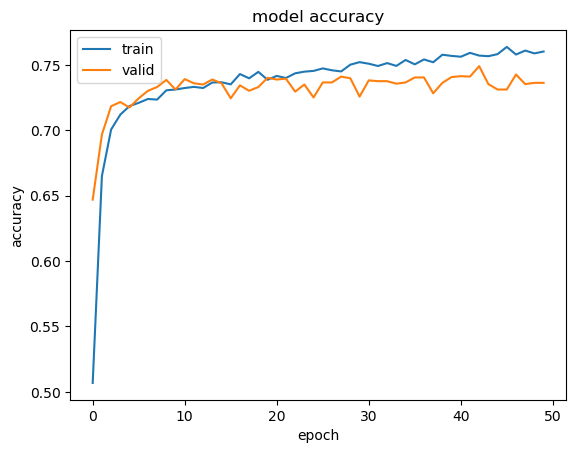

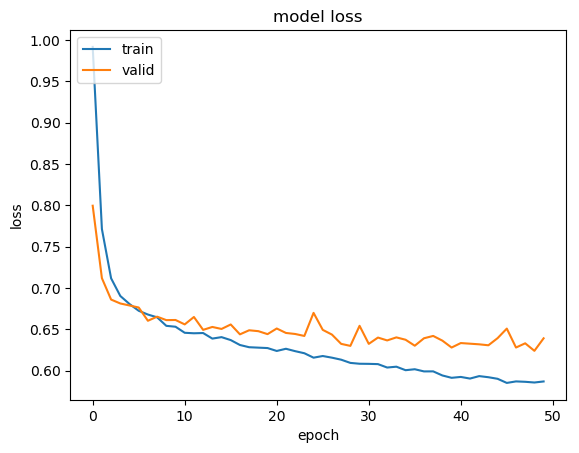

In [43]:
# Plot model accuracy over epochs
sns.reset_orig()   # Reset seaborn settings to get rid of black background
plt.plot(estimator.history['acc'])
plt.plot(estimator.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Plot model loss over epochs
plt.plot(estimator.history['loss'])
plt.plot(estimator.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [44]:
# Make predictions
predicted_prob = model.predict(X_test)
print(predicted_prob.shape)

(3916, 3)


In [45]:
print(predicted_prob)

[[0.0430035  0.00965623 0.94734025]
 [0.10715808 0.23953222 0.6533097 ]
 [0.47656155 0.06412003 0.45931837]
 ...
 [0.01406829 0.00147611 0.9844556 ]
 [0.1215021  0.05062048 0.82787746]
 [0.03940169 0.02092415 0.93967414]]
